In [11]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import tensorflow as tf
import numpy as np
import math
import matplotlib
#matplotlib.use("Agg")
import matplotlib.image as mpimg
import glob
from data_utils import load_data, augment_data,normalise_train,normalise_test,rgb2gray,rgb2lab,lab2rgb
import matplotlib.pyplot as plt
from tucha import complex_pokemon_model,baselinish,simpler_model,baselinish2,complex_pokemon_model2,baselinish3

from cs231n.data_utils import load_CIFAR10

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
# Load the raw CIFAR-10 data.
cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

# As a sanity check, we print out the size of the training and test data.
print('Training data shape: ', X_train.shape)
print('Test data shape: ', X_test.shape)

Training data shape:  (50000, 32, 32, 3)
Test data shape:  (10000, 32, 32, 3)


In [13]:
def show_images(images,gray = False):   
    if(gray):
        plt.imshow(images,cmap = plt.get_cmap('gray'))
    else :
        plt.imshow(images);

    plt.show()

7.45152


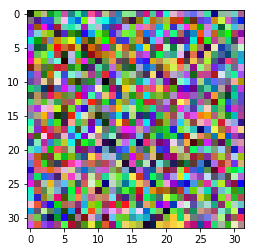

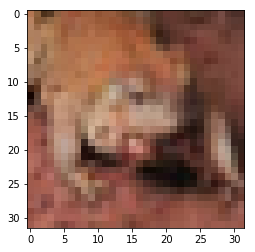

12.2241


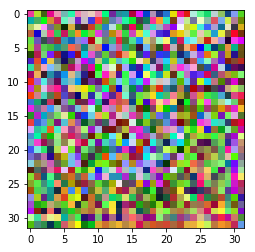

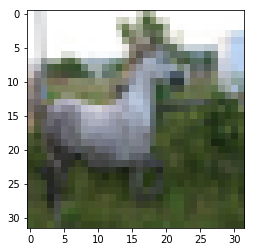

8.67648


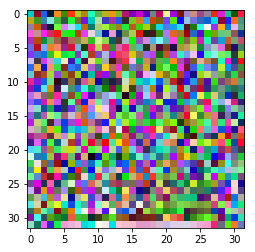

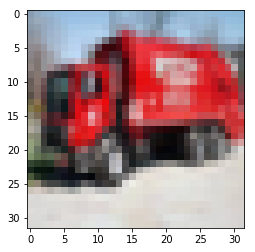

4.29808


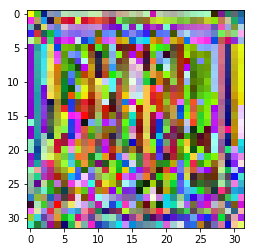

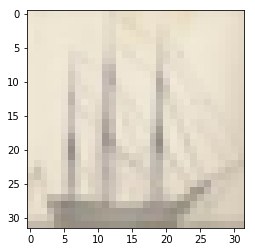

4.48421


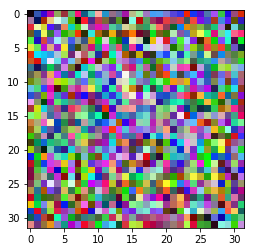

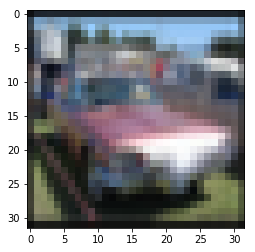

2.67665


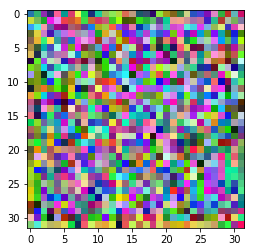

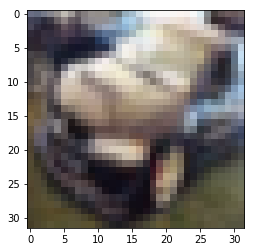

2.3932


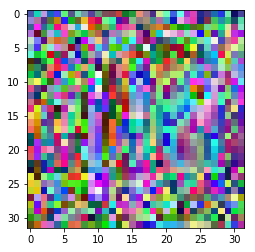

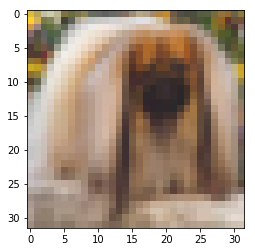

2.25295


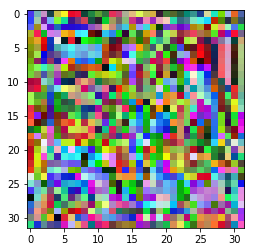

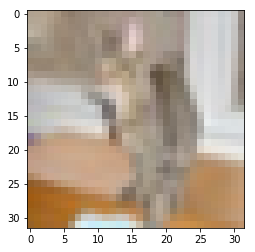

1.89164


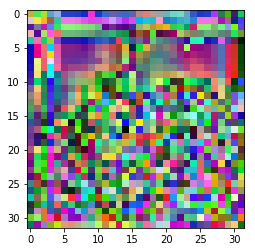

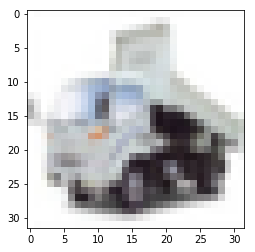

1.59725


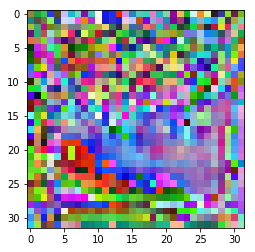

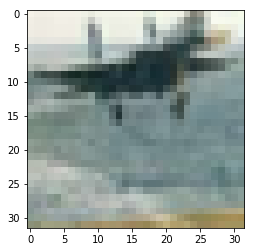

1.42922


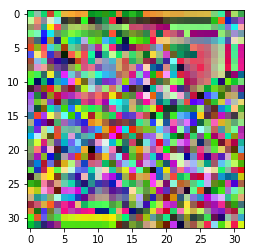

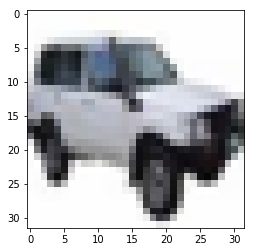

1.3483


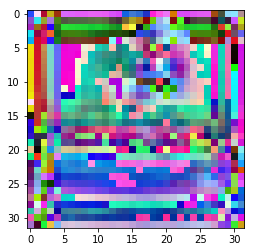

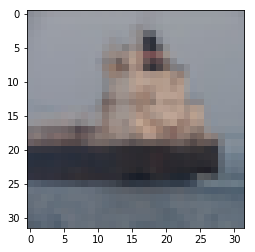

1.15662


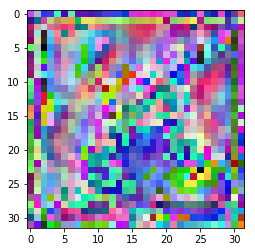

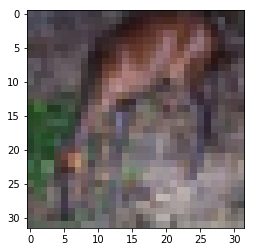

0.998245


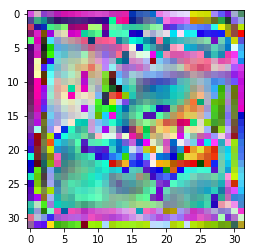

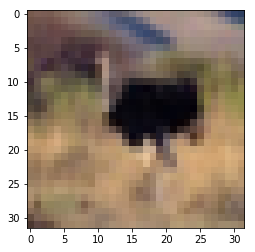

0.897442


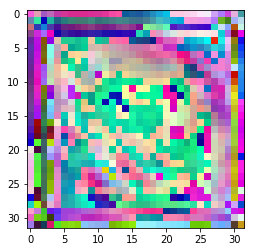

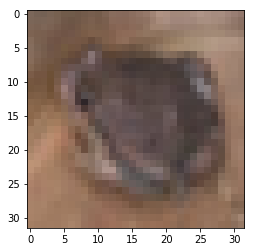

0.886108


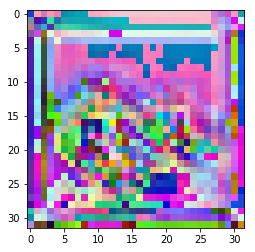

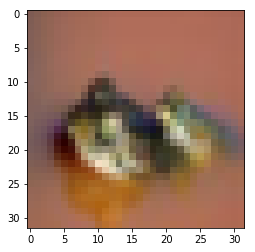

0.786602


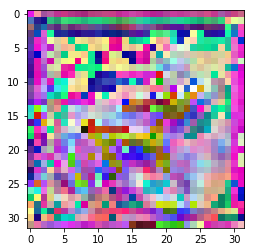

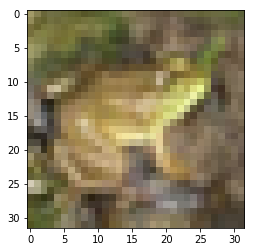

0.647351


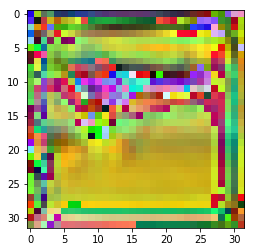

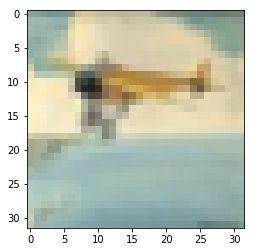

0.568287


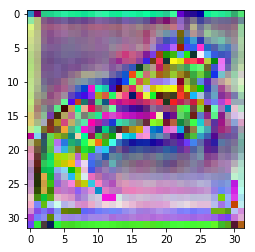

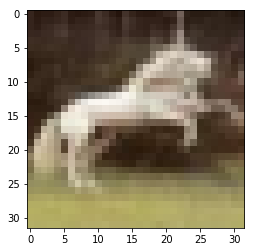

0.514679


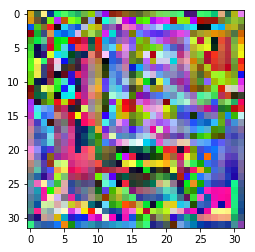

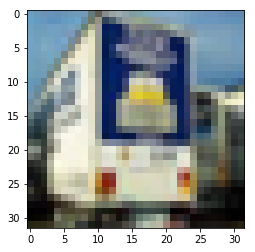

0.501564


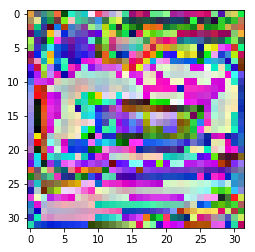

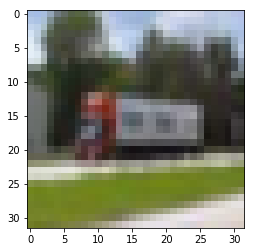

0.442559


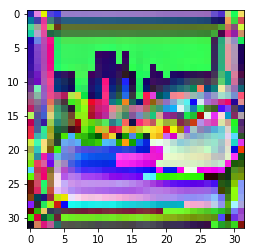

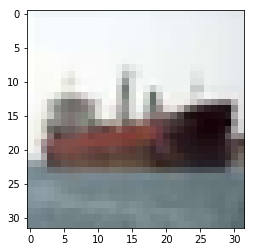

0.349079


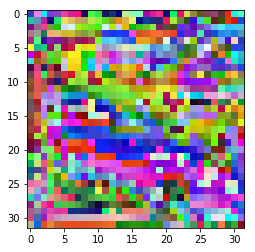

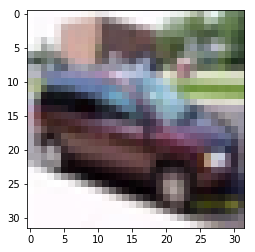

0.303012


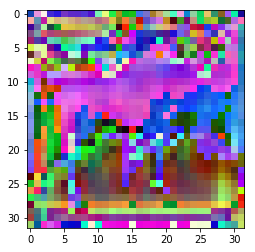

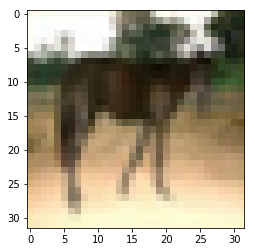

0.275278


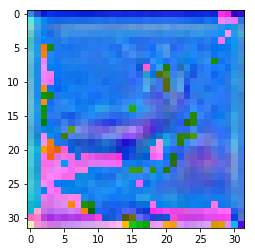

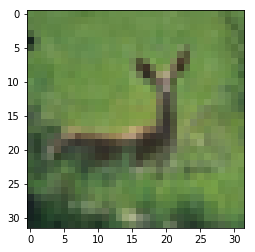

0.271365


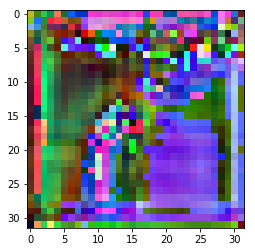

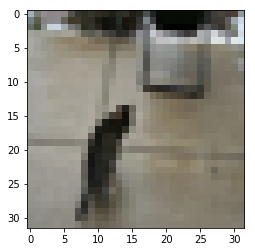

0.231098


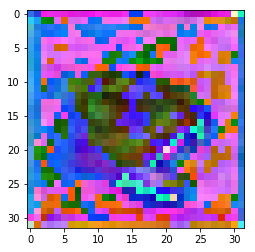

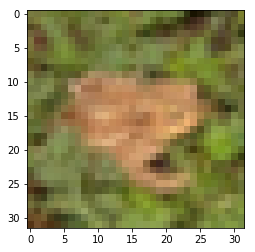

0.194529


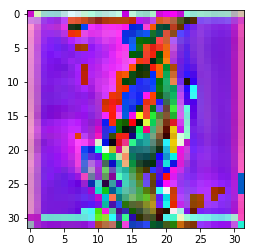

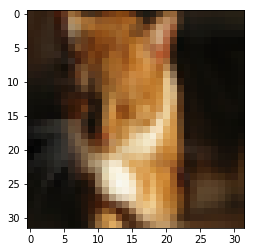

0.171291


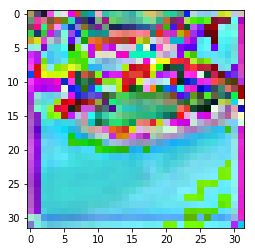

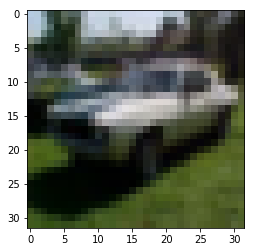

0.164871


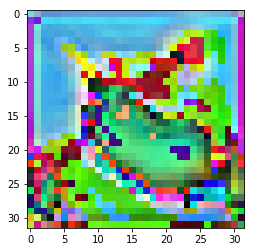

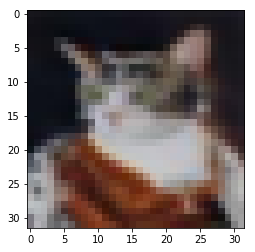

0.151536


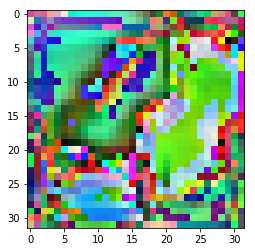

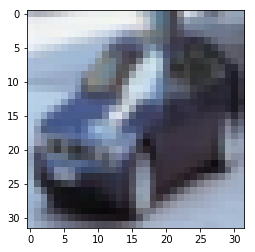

0.110678


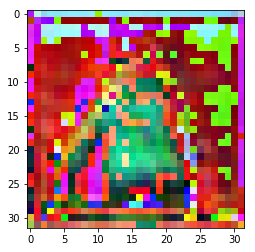

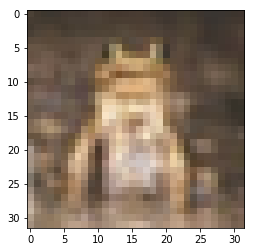

0.0969091


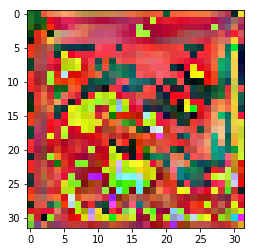

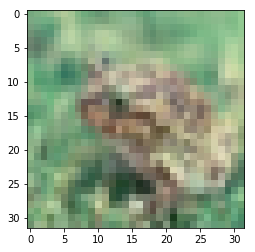

0.100305


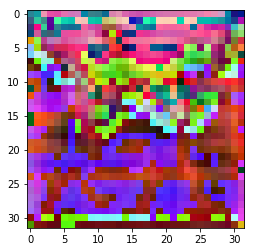

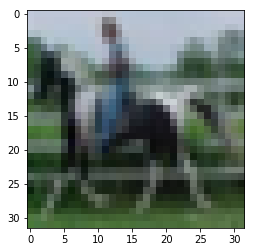

0.089885


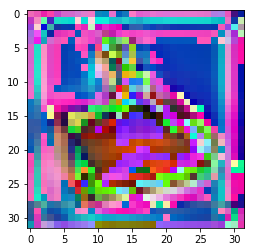

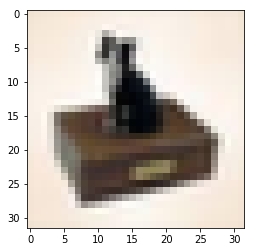

0.0724146


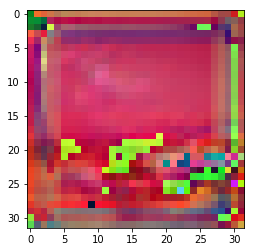

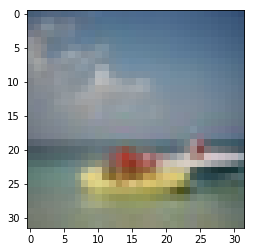

0.0658578


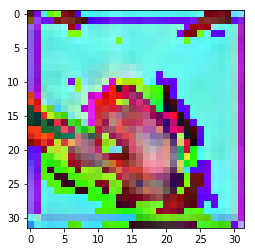

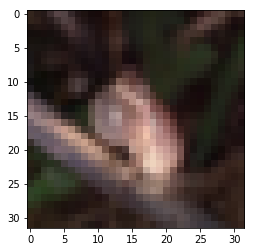

0.0593238


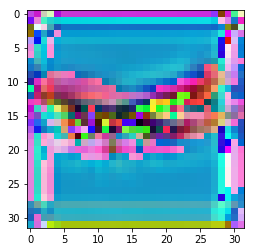

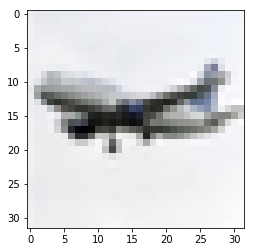

0.0581431


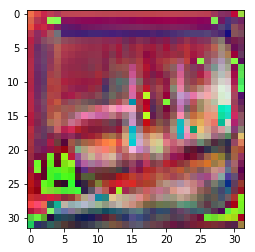

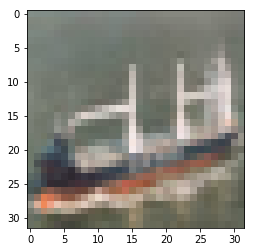

0.0552469


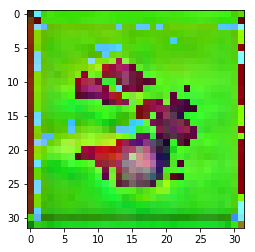

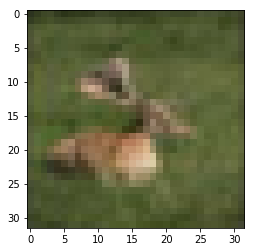

0.0491216


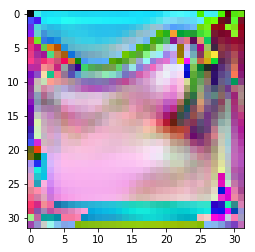

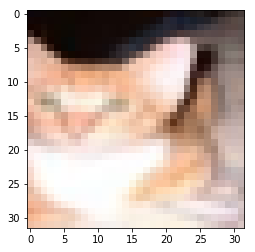

0.0427427


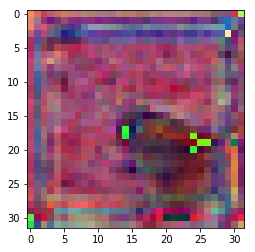

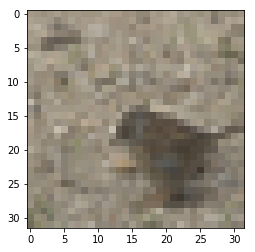

0.0422539


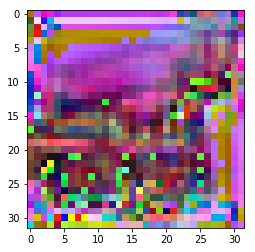

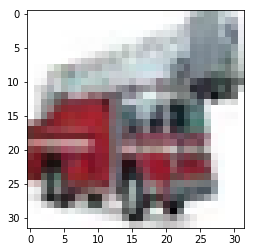

0.0434815


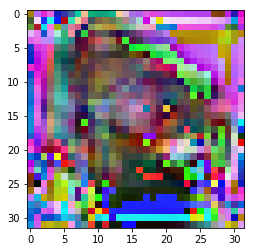

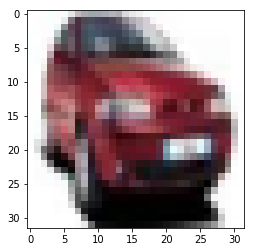

0.0316713


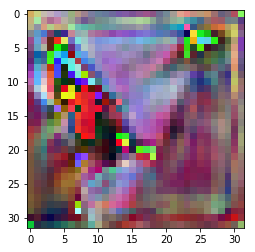

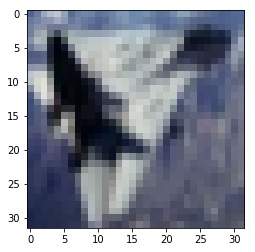

0.0275776


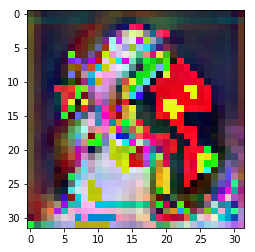

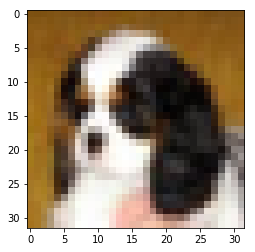

0.0300764


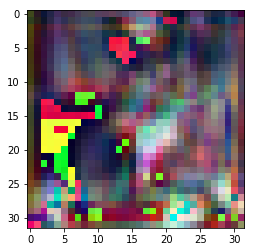

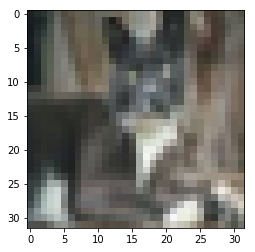

0.0315674


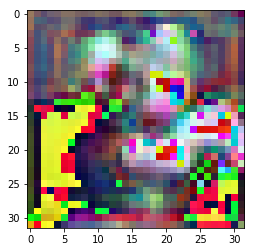

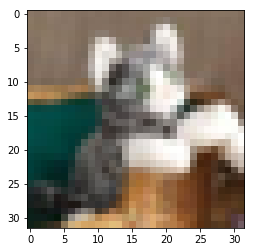

0.0274565


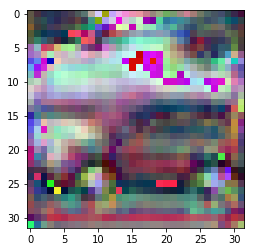

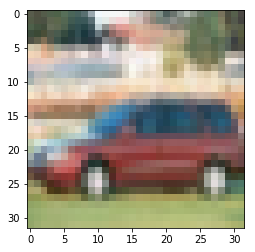

0.0227114


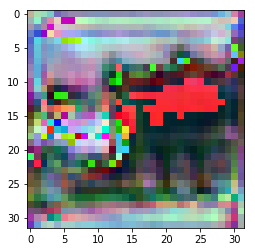

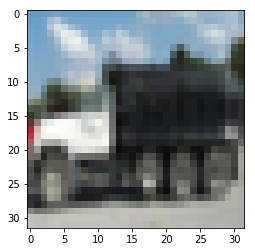

0.0292733


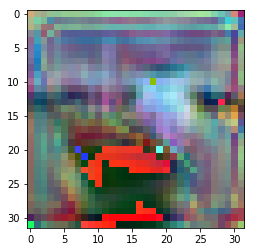

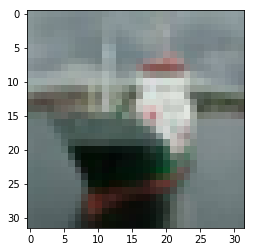

0.0251555


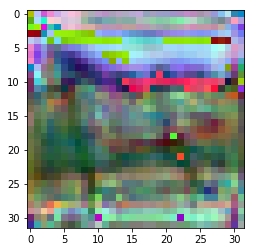

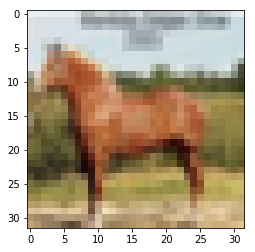

0.0255783


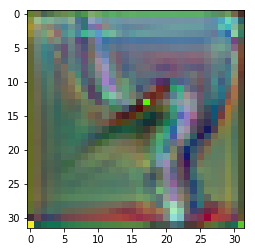

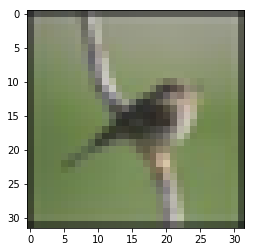

0.0226069


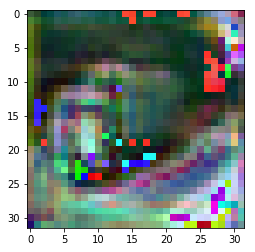

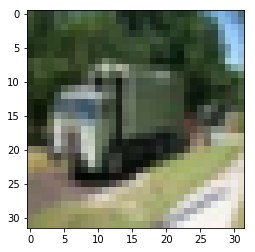

0.0236391


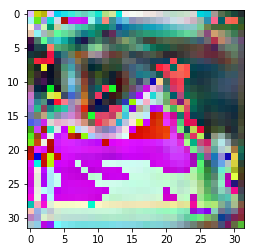

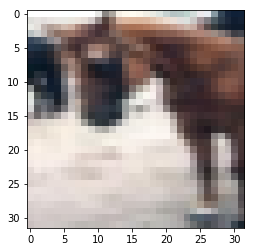

0.0239531


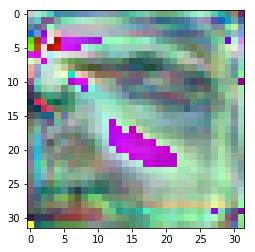

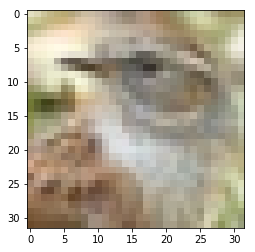

0.0238014


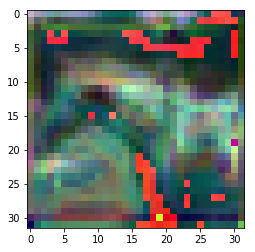

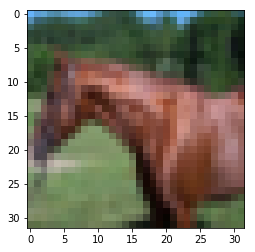

0.0254544


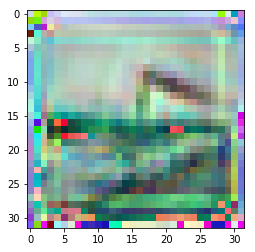

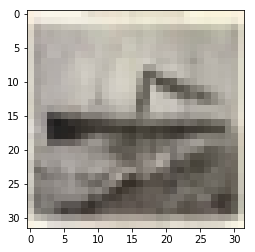

0.0262469


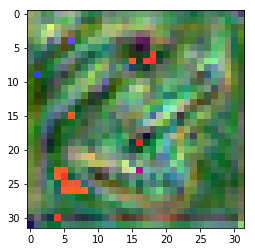

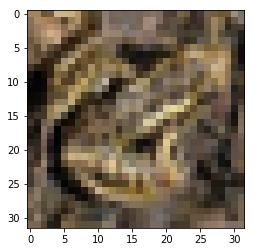

0.0264342


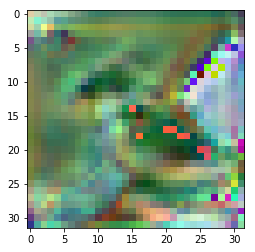

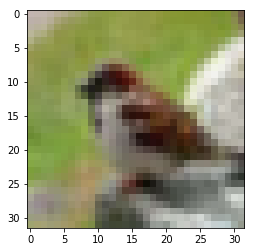

0.0224849


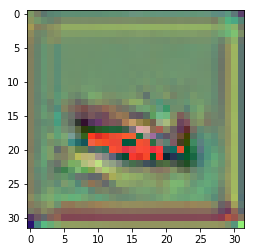

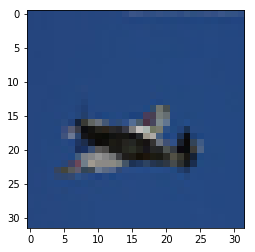

0.0222759


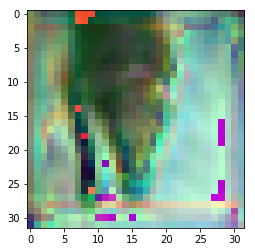

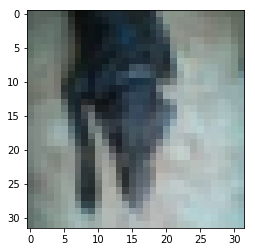

0.0292835


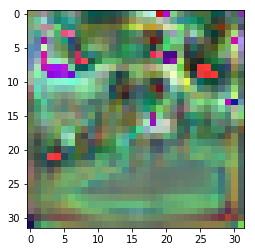

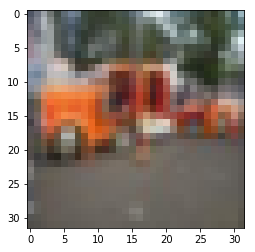

0.023557


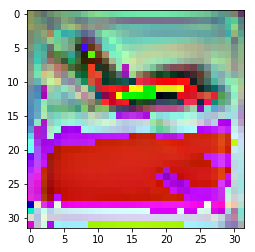

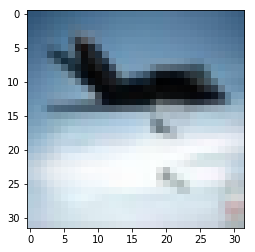

0.0205607


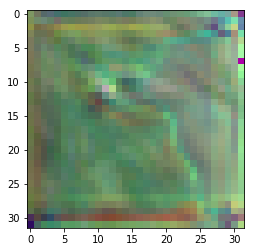

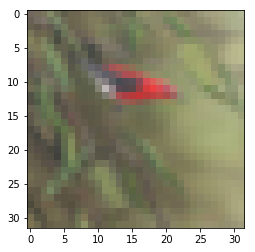

0.0202324


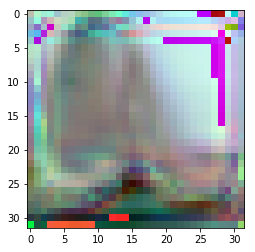

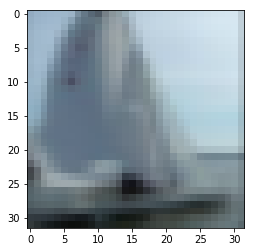

0.0237922


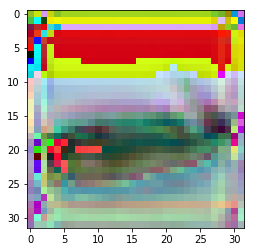

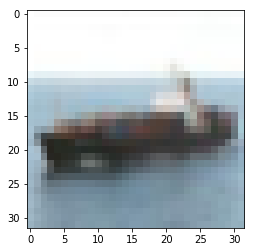

0.0194867


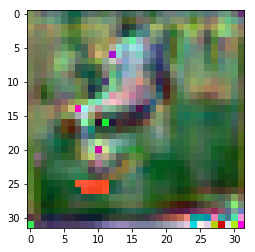

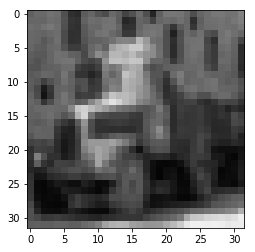

0.0181238


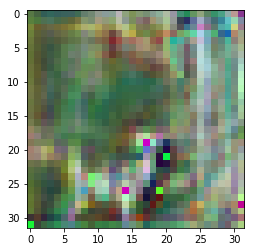

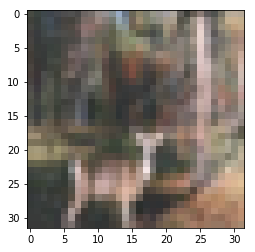

0.0201103


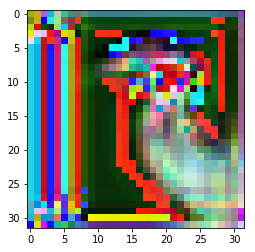

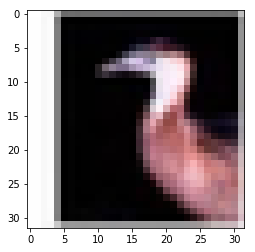

0.0194137


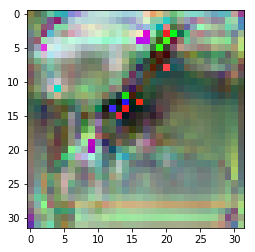

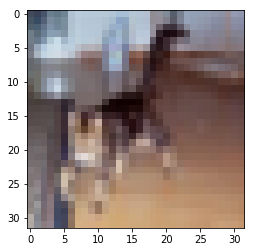

0.0162691


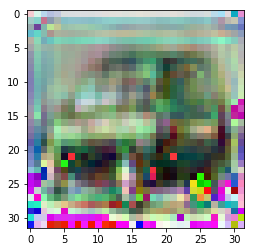

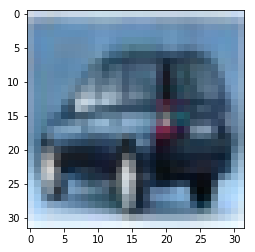

0.0175151


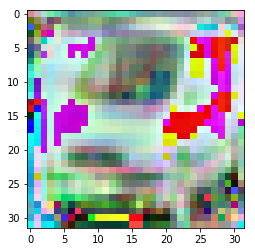

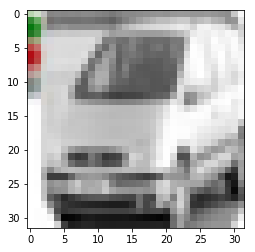

0.016288


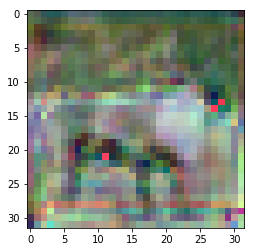

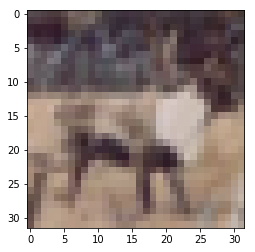

0.0170657


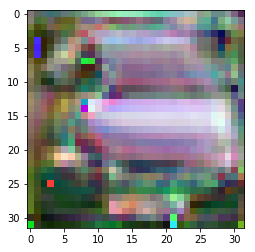

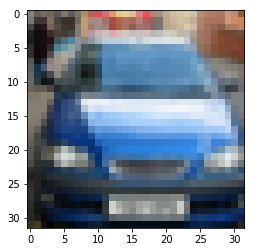

0.0165466


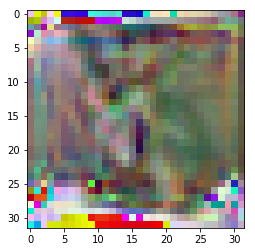

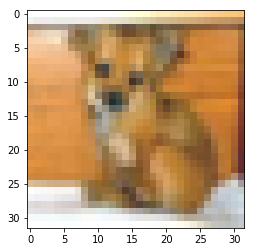

0.0147421


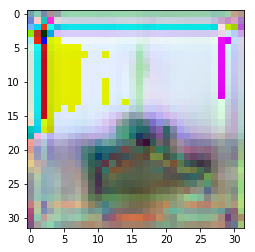

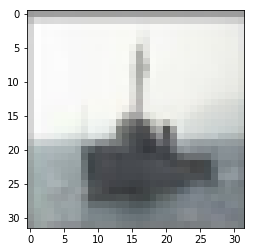

0.0145573


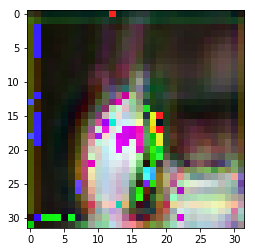

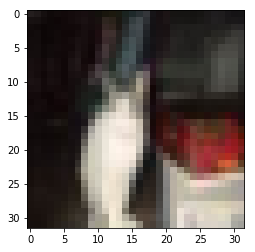

0.0151594


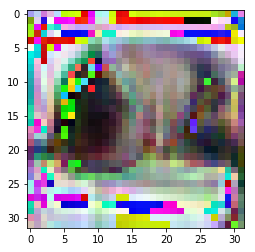

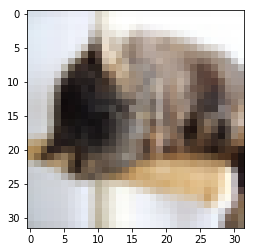

0.0145389


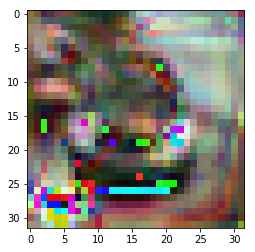

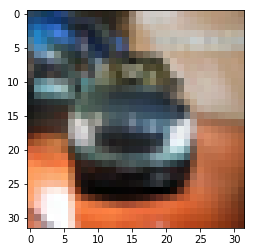

0.0130398


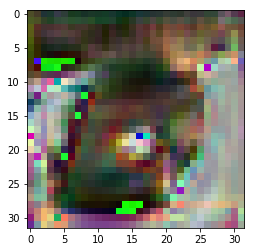

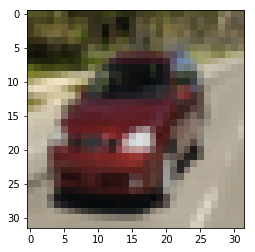

In [ ]:
tf.reset_default_graph()
Y = tf.placeholder(tf.uint8 ,[None , 32,32,3])
is_training = tf.placeholder(tf.bool)


with tf.variable_scope("model") as scope:
    hsv_out,rgb_out,hsv_in,rgb_in = baselinish3(Y,is_training)
    loss = tf.reduce_mean(tf.square(rgb_out-rgb_in))
    
    optimiser = tf.train.AdamOptimizer(3e-3)
    train_step = optimiser.minimize(loss)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

batch_size = 64
epoch_number = 0
def train_epoch(target):
    sizee = target.shape[0]
    for i in range(sizee//batch_size):
        feed_dict = {Y: (target[i*batch_size:batch_size*i+batch_size]),is_training:True}
        losses,_,rgb_o,rgb_i = sess.run([loss,train_step,rgb_out,rgb_in],feed_dict)
        print (losses)
        if(epoch_number % 5 == 0):
            show_images(rgb_o[5])
            show_images(rgb_i[5])

  

def val_result(data, target):
    sizee = data.shape[0]
    for i in range(sizee//batch_size):
        feed_dict = {Y:  (target[i*batch_size:batch_size*i+batch_size]), 
                     X: data[i*batch_size:batch_size*i+batch_size],is_training:False}
        losses = sess.run([loss_test,rgb_out],feed_dict)
        if(i%5 ==0):
            print (losses)

num_epochs = 5
for i in range(num_epochs):
    epoch_number = i
    train_epoch(X_test)
    print ("Next Epoch",i)
